In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [2]:
from plotly.offline import download_plotlyjs,iplot,plot,init_notebook_mode

In [3]:
init_notebook_mode(connected=True)

In [4]:
import glob

In [ ]:
glob.glob(r'C:\Users\abina\Downloads\Gaurav Projects\individual_stocks_5yr-20241107T090753Z-001\individual_stocks_5yr\*csv')

In [8]:
file=[ 'C:\\Users\\abina\\Downloads\\Gaurav Projects\\individual_stocks_5yr-20241107T090753Z-001\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\abina\\Downloads\\Gaurav Projects\\individual_stocks_5yr-20241107T090753Z-001\\individual_stocks_5yr\\AMZN_data.csv',
 'C:\\Users\\abina\\Downloads\\Gaurav Projects\\individual_stocks_5yr-20241107T090753Z-001\\individual_stocks_5yr\\GOOGL_data.csv',
 'C:\\Users\\abina\\Downloads\\Gaurav Projects\\individual_stocks_5yr-20241107T090753Z-001\\individual_stocks_5yr\\MSFT_data.csv']

In [18]:
## list comprehension : List comprehension is a concise way to create lists in Python.....
#......It allows you to apply an expression to each item in an iterable (like a list, tuple, or range)......
#......and collect the results in a new list, all in a single line of code.



df=pd.DataFrame()
df_list=[pd.read_csv(x) for x in file]
df=pd.concat(df_list)

In [19]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [20]:
df.shape

(5036, 7)

In [21]:
df['Name'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

In [23]:
df.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [37]:
###To check oulier : 
Q1=df['close'].quantile(q=.25)
Q3=df['close'].quantile(q=.75)
IQR=Q3-Q1
filters=df[(df['close']< (1.5-IQR) )| (df['close'] > (1.5+IQR))]

In [38]:
filters

,date,open,high,low,close,volume,Name
618,2015-07-24,578.99,580.5700,529.35,529.42,21909381,AMZN
619,2015-07-27,527.75,544.9500,526.60,531.41,7490960,AMZN
620,2015-07-28,536.00,536.3900,523.12,526.03,5273092,AMZN
621,2015-07-29,530.92,532.9655,525.02,529.00,3752634,AMZN
622,2015-07-30,527.65,539.2000,524.29,536.76,3743065,AMZN
...,...,...,...,...,...,...,...
1254,2018-02-01,1175.99,1187.4500,1169.36,1181.59,3675709,GOOGL
1255,2018-02-02,1127.42,1131.3000,1111.17,1119.20,5892122,GOOGL
1256,2018-02-05,1100.61,1114.9900,1056.74,1062.39,4177469,GOOGL
1257,2018-02-06,1033.98,1087.3800,1030.01,1084.43,3831524,GOOGL


In [45]:
df[(df['close']< (Q1-1.5*IQR) )| (df['close'] > (Q3+1.5*IQR))]['close']

1247    1362.54
1248    1357.51
1249    1377.95
1250    1402.05
1251    1417.68
1252    1437.82
1253    1450.89
1254    1390.00
1255    1429.95
1256    1390.00
1257    1442.84
1258    1416.78
Name: close, dtype: float64

In [53]:
df['close'].quantile(q=1)


1450.89

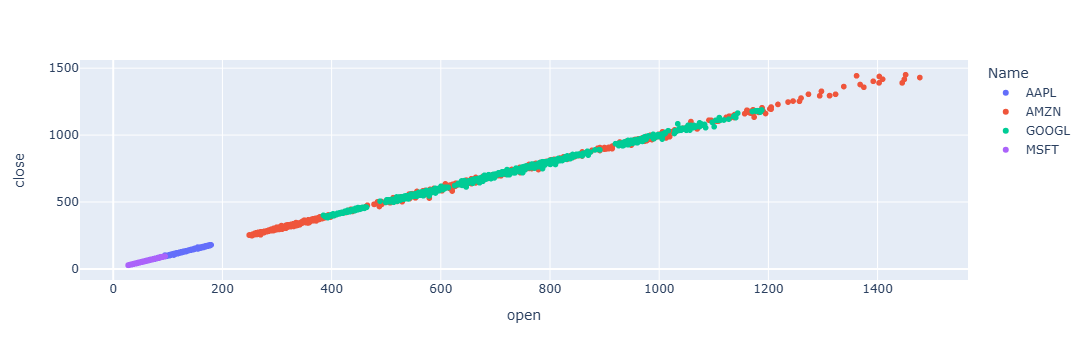

In [63]:
px.scatter(data_frame=df,x='open',y='close',color='Name')

In [ ]:
##To deal with outlier with binning

df['binned_column'] = pd.qcut(df['Trades'], q=4, labels=['low', 'medium', 'high'],duplicates='drop')


In [67]:
df['binned_column']=pd.qcut(df['close'],q=4,labels=['low','med','high','V_high'],duplicates='drop')

In [71]:
df[df['binned_column']=='V_high']['close']

682      599.03
683      608.61
684      611.01
685      617.10
686      626.55
         ...   
1254    1181.59
1255    1119.20
1256    1062.39
1257    1084.43
1258    1055.41
Name: close, Length: 1259, dtype: float64

# Change in stock price  overtime

In [72]:
df.columns


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'binned_column'],
      dtype='object')

In [73]:
df.head()

,date,open,high,low,close,volume,Name,binned_column
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,low
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,low
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,low
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,low
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,low


In [81]:
df['date']=pd.to_datetime(df['date'])

In [83]:
df.set_index(df['date'],inplace=True)

<Axes: title={'center': 'Apple Closing_Price'}, xlabel='date', ylabel='Closing_Price'>

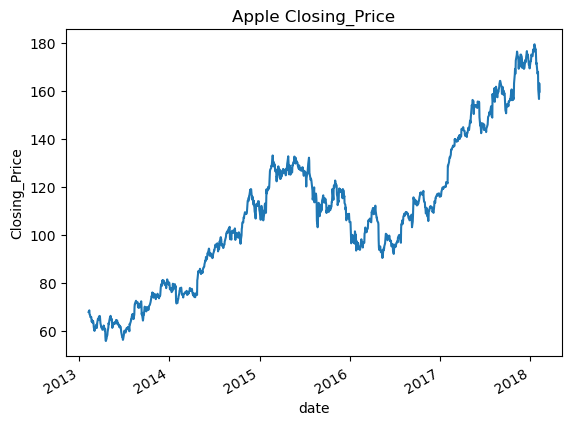

In [90]:
df[df['Name']=='AAPL']['close'].plot(ylabel='Closing_Price',title='Apple Closing_Price')

In [85]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'binned_column'],
      dtype='object')

<Axes: xlabel='date', ylabel='close'>

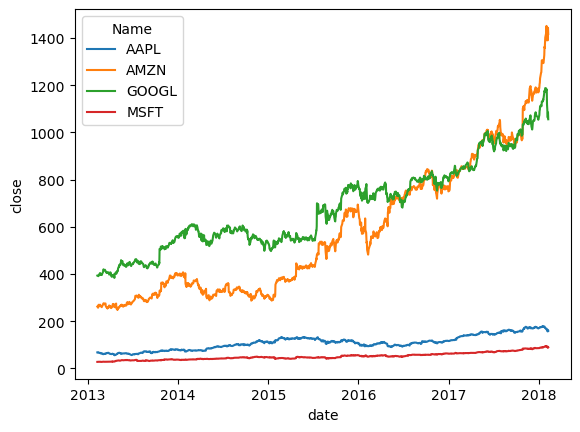

In [95]:
sns.lineplot(data=df,x='date',y='close',hue='Name')


In [ ]:
df[df['Name']=='AAPL']['close'].plot(ylabel='Closing_Price',title='Apple Closing_Price')

In [103]:
tech_list=df['Name'].unique()

In [106]:
tech_list

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

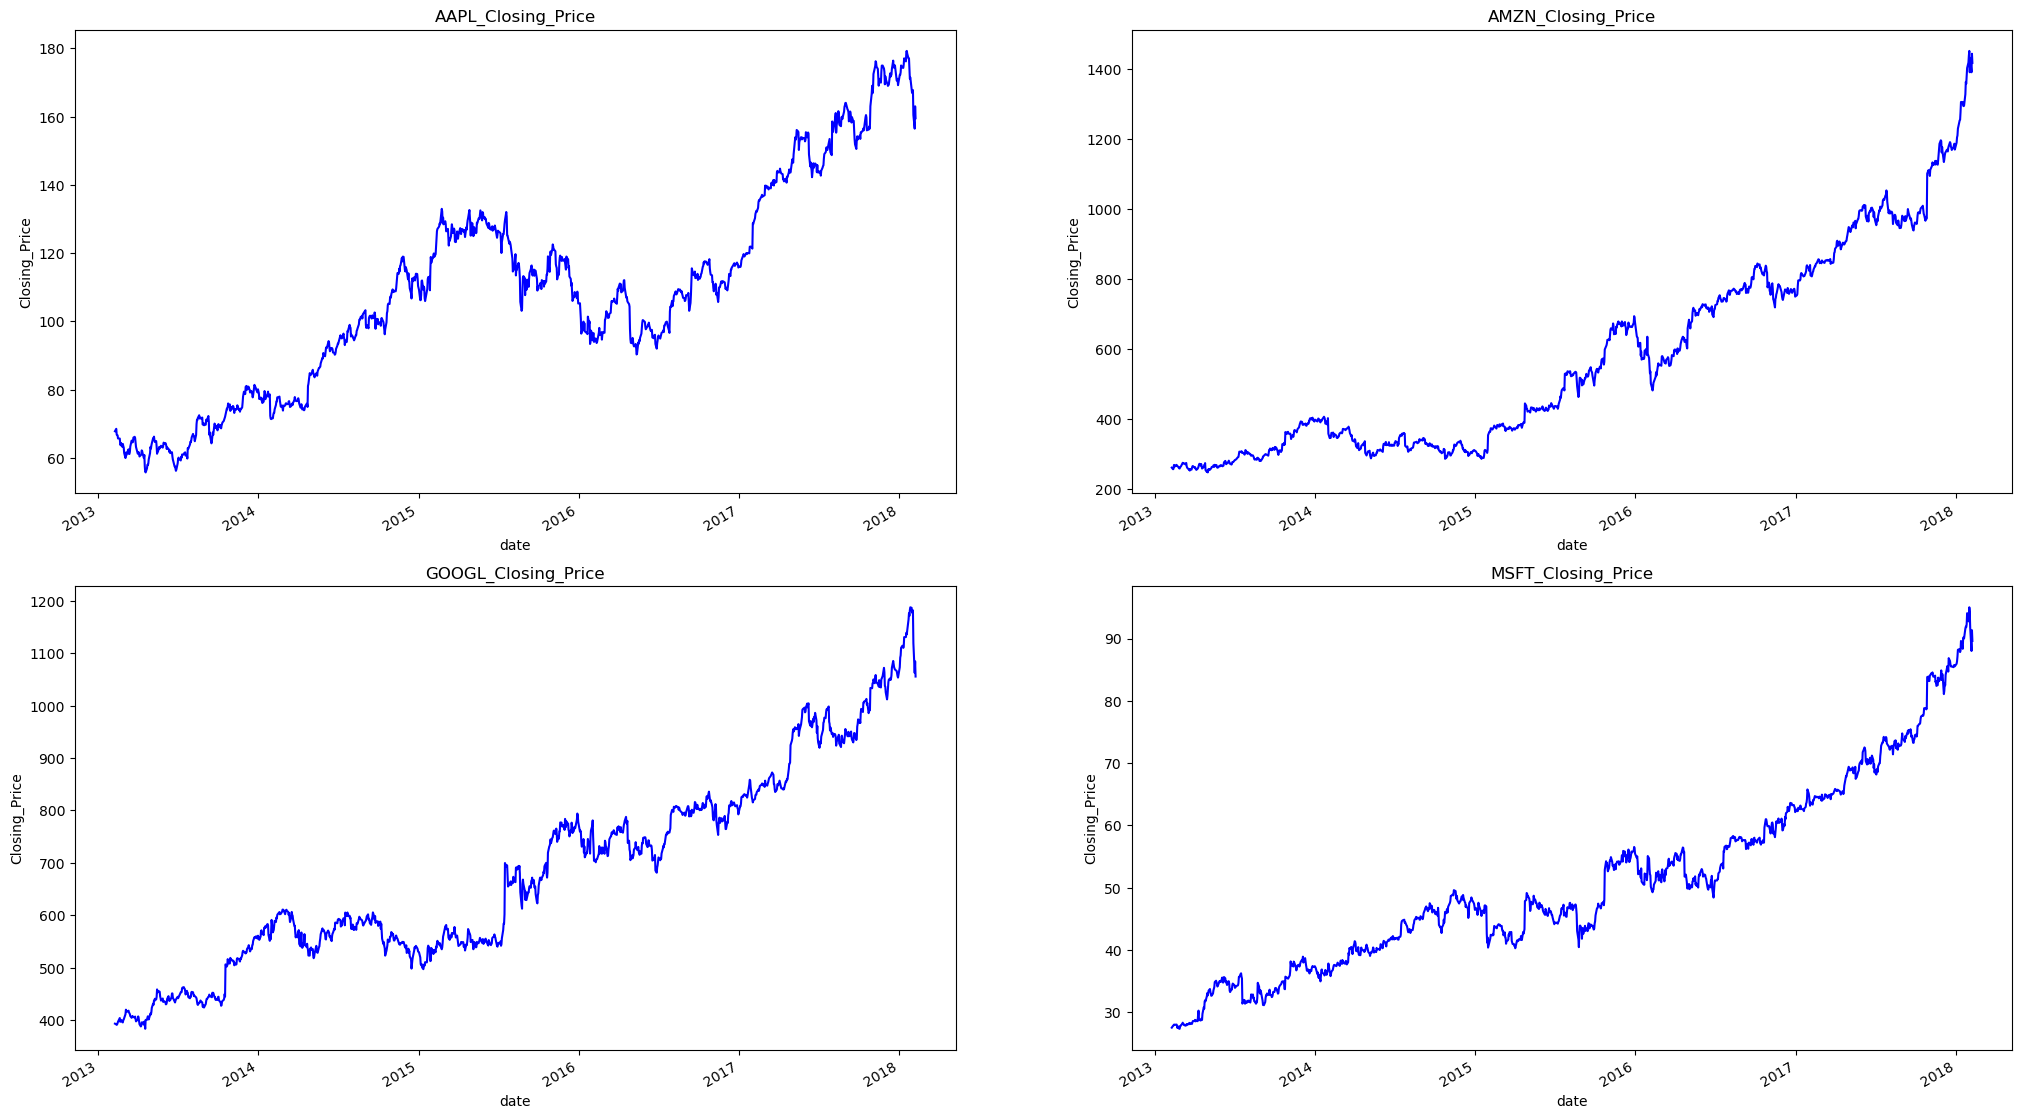

In [114]:
plt.figure(figsize=(25,15))

for index,name in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    df[df['Name']==name]['close'].plot(ylabel='Closing_Price',title=name +'_Closing_Price',color='blue')

# Calculate Moving Avg:


In [115]:
df.head()

,date,open,high,low,close,volume,Name,binned_column
date,,,,,,,,
2013-02-08,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,low
2013-02-11,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,low
2013-02-12,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,low
2013-02-13,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,low
2013-02-14,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,low


In [123]:
##To calculate moving avg for window size 10,50,100
df['Closing_10']=df['close'].rolling(10).mean()
df['Closing_50']=df['close'].rolling(50).mean()
df['Closing_100']=df['close'].rolling(100).mean()
df['Closing_500']=df['close'].rolling(500).mean()

In [124]:
df.tail()

,date,open,high,low,close,volume,Name,binned_column,Closing_10,Closing_50,Closing_100,Closing_500
date,,,,,,,,,,,,
2018-02-01,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,med,92.765,86.9978,82.7137,65.34414
2018-02-02,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,med,92.943,87.1828,82.8839,65.42914
2018-02-05,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,med,92.582,87.2684,83.0171,65.50572
2018-02-06,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,med,92.525,87.4328,83.1783,65.58900
2018-02-07,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,med,92.304,87.5598,83.3267,65.66722


In [128]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'binned_column', 'Closing_10', 'Closing_50', 'Closing_100',
       'Closing_500'],
      dtype='object')

<Axes: xlabel='date'>

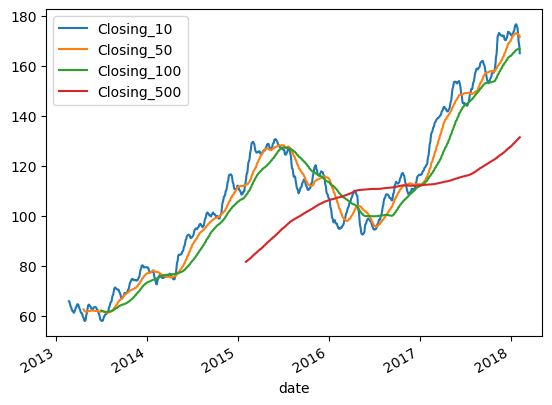

In [143]:
df[df['Name']=='AAPL'][['Closing_10', 'Closing_50', 'Closing_100',
       'Closing_500']].plot()

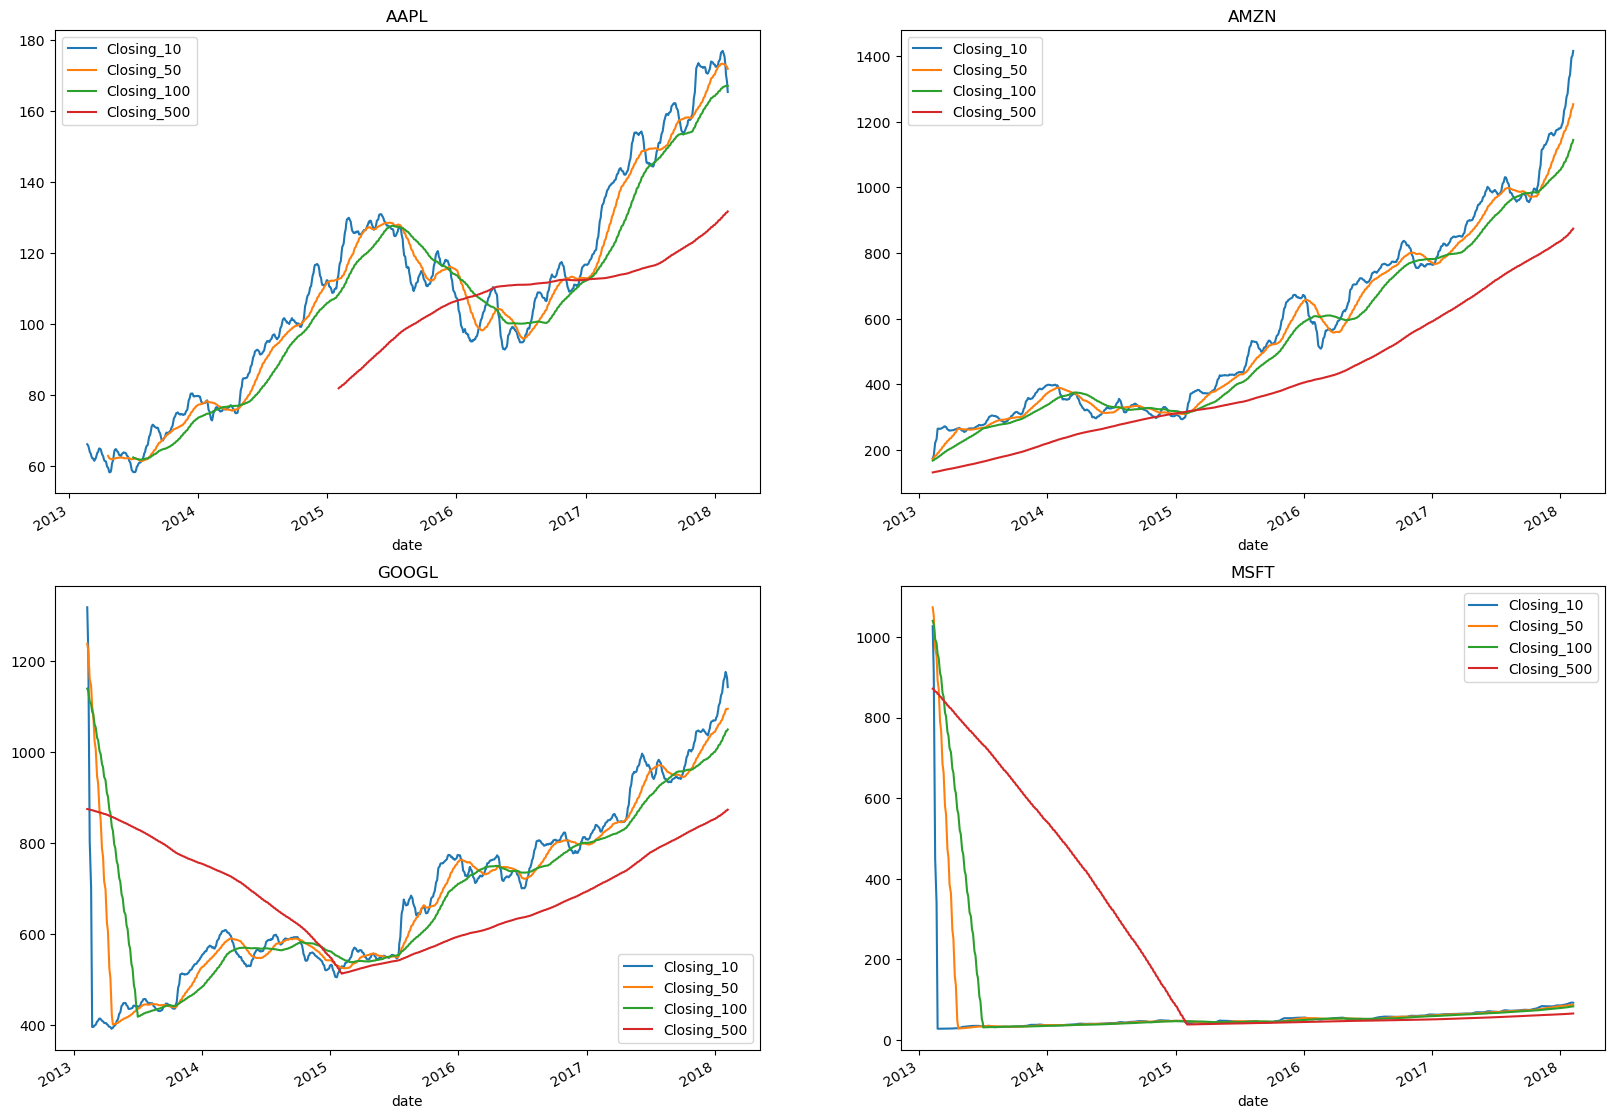

In [132]:
plt.figure(figsize=(20,15))

for index,closing in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=df['Name']==closing
    df1=df[filter1]
    df1[['Closing_10', 'Closing_50', 'Closing_100','Closing_500']].plot(ax=plt.gca())
    plt.title(closing)
    
##ax=plt.gca() specifies that the plot should be drawn on the current subplot axis.


In [133]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'binned_column', 'Closing_10', 'Closing_50', 'Closing_100',
       'Closing_500'],
      dtype='object')

<Axes: xlabel='date'>

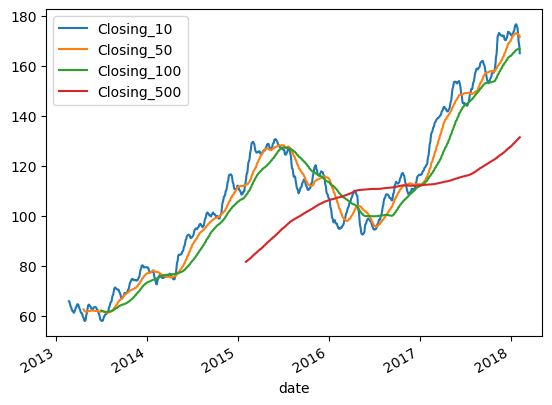

In [145]:
df[df['Name']=='AAPL'][['Closing_10', 'Closing_50', 'Closing_100',
       'Closing_500']].plot()

## Analyzing closing price change in aapl

In [147]:
df['Name'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

In [157]:
df['Chnage']=df['close'].pct_change()*100

In [158]:
df

,date,open,high,low,close,volume,Name,binned_column,Closing_10,Closing_50,Closing_100,Closing_500,Chnage
date,,,,,,,,,,,,,
2013-02-08,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,low,NaN,NaN,NaN,NaN,NaN
2013-02-11,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,low,NaN,NaN,NaN,NaN,1.042235
2013-02-12,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,low,NaN,NaN,NaN,NaN,-2.506658
2013-02-13,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,low,NaN,NaN,NaN,NaN,-0.190297
2013-02-14,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,low,NaN,NaN,NaN,NaN,-0.089934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,med,92.765,86.9978,82.7137,65.34414,-0.789391
2018-02-02,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,med,92.943,87.1828,82.8839,65.42914,-2.631021
2018-02-05,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,med,92.582,87.2684,83.0171,65.50572,-4.118544


<Axes: xlabel='date'>

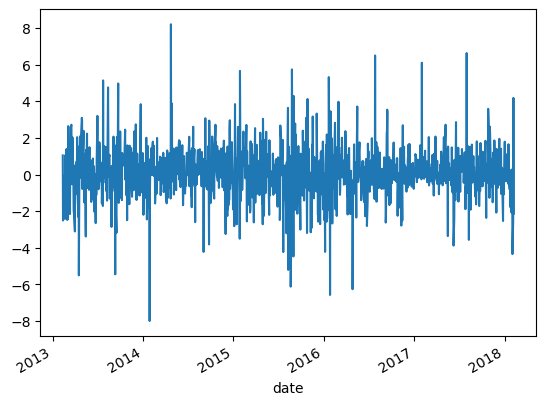

In [164]:
df[df['Name']=='AAPL']['Chnage'].plot()

## Performing resampling analysis of closing price

In [182]:
df['Year_resample']=df['close'].resample('Y').sum()
df['Mo_resample']=df['close'].resample('M').sum()
df['Qu_resample']=df['close'].resample('Q').sum()
df['Week_resample']=df['close'].resample('W').sum()
df['Day_resample']=df['close'].resample('D').sum()

In [183]:
df.head()

,date,open,high,low,close,volume,Name,binned_column,Closing_10,Closing_50,Closing_100,Closing_500,Chnage,Year_resample,Mo_resample,Qu_resample,Week_resample,Day_resample
date,,,,,,,,,,,,,,,,,,
2013-02-08,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.4319
2013-02-11,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,low,NaN,NaN,NaN,NaN,1.042235,NaN,NaN,NaN,NaN,745.2326
2013-02-12,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,low,NaN,NaN,NaN,NaN,-2.506658,NaN,NaN,NaN,NaN,744.1631
2013-02-13,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,low,NaN,NaN,NaN,NaN,-0.190297,NaN,NaN,NaN,NaN,756.0370
2013-02-14,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,low,NaN,NaN,NaN,NaN,-0.089934,NaN,NaN,NaN,NaN,758.2395


In [ ]:
df

## To check if closing price of tech co are corrleated  or not?

In [202]:
closing_price=pd.DataFrame()


In [203]:
df['Name'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

In [205]:
closing_price['aapl']=df[df['Name']=='AAPL']['close']
closing_price['AMZN']=df[df['Name']=='AMZN']['close']
closing_price['GOOGL']=df[df['Name']=='GOOGL']['close']
closing_price['MSFT']=df[df['Name']=='MSFT']['close']

In [209]:
closing_price.corr()

,aapl,AMZN,GOOGL,MSFT
aapl,1.000000,0.819078,0.843736,0.899689
AMZN,0.819078,1.000000,0.973988,0.955977
GOOGL,0.843736,0.973988,1.000000,0.970779
MSFT,0.899689,0.955977,0.970779,1.000000


<Axes: >

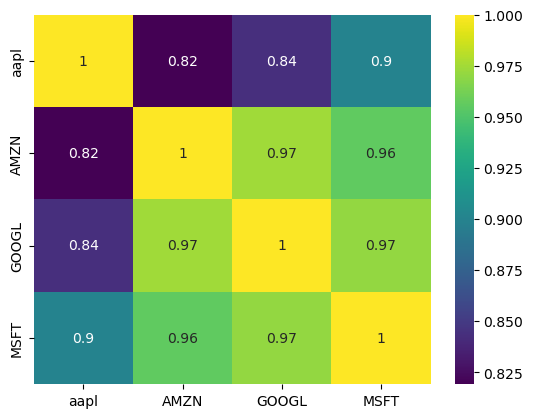

In [216]:
sns.heatmap(closing_price.corr(),annot=True,cmap='viridis')

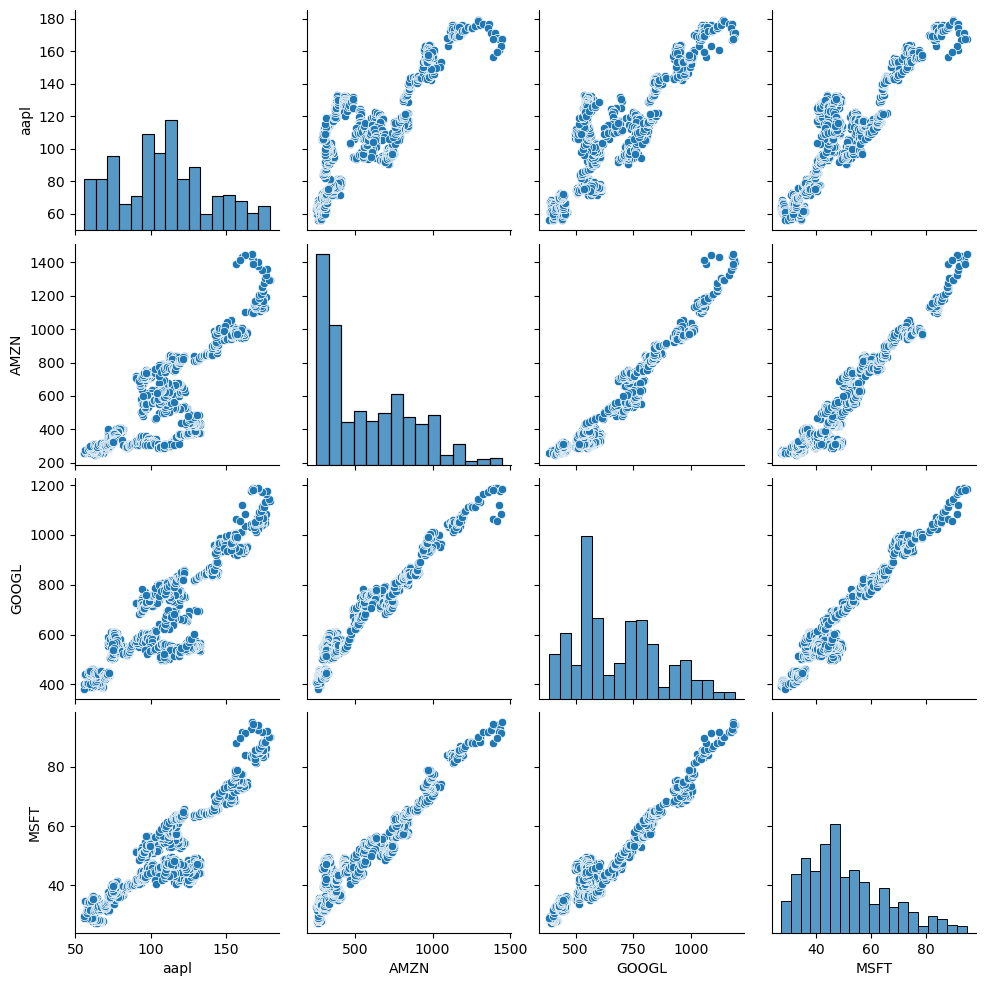

In [225]:
sns.pairplot(closing_price)

## Performing corr analysis :
To analyze whether daily change in cp of stock are correlated or not

In [229]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'binned_column', 'Closing_10', 'Closing_50', 'Closing_100',
       'Closing_500', 'Chnage', 'Year_resample', 'Mo_resample', 'Qu_resample',
       'Week_resample', 'Day_resample'],
      dtype='object')

In [231]:
df['Name'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

In [234]:
df['aapl_daily^']=df[df['Name']=='AAPL']['close'].pct_change()

<Axes: xlabel='close', ylabel='aapl_daily^'>

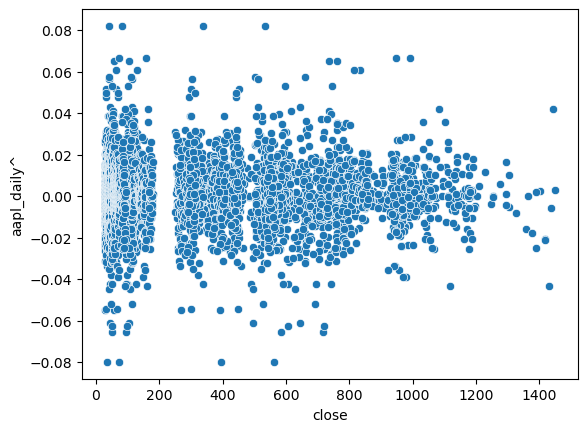

In [237]:
sns.scatterplot(data=df,x='close',y='aapl_daily^')

In [239]:
df[['aapl_daily^','close']].corr()

,aapl_daily^,close
aapl_daily^,1.000000,-0.001661
close,-0.001661,1.000000


In [240]:
df['daily_change']=df['close'].pct_change()

<Axes: xlabel='close', ylabel='daily_change'>

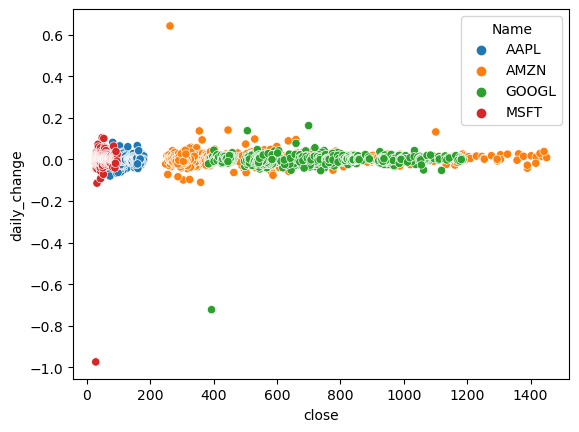

In [241]:
sns.scatterplot(data=df,x='close',y='daily_change',hue='Name')

In [246]:
change_price=pd.DataFrame()
change_price['Aapl']=df[df['Name']=='AAPL']['close'].pct_change()
change_price['AMZN']=df[df['Name']=='AMZN']['close'].pct_change()
change_price['GOOGL']=df[df['Name']=='GOOGL']['close'].pct_change()
change_price['MSFT']=df[df['Name']=='MSFT']['close'].pct_change()

In [244]:
closing_price

,aapl,AMZN,GOOGL,MSFT
date,,,,
2013-02-08,67.8542,261.95,393.0777,27.55
2013-02-11,68.5614,257.21,391.6012,27.86
2013-02-12,66.8428,258.70,390.7403,27.88
2013-02-13,66.7156,269.47,391.8214,28.03
2013-02-14,66.6556,269.24,394.3039,28.04
...,...,...,...,...
2018-02-01,167.7800,1390.00,1181.5900,94.26
2018-02-02,160.5000,1429.95,1119.2000,91.78
2018-02-05,156.4900,1390.00,1062.3900,88.00


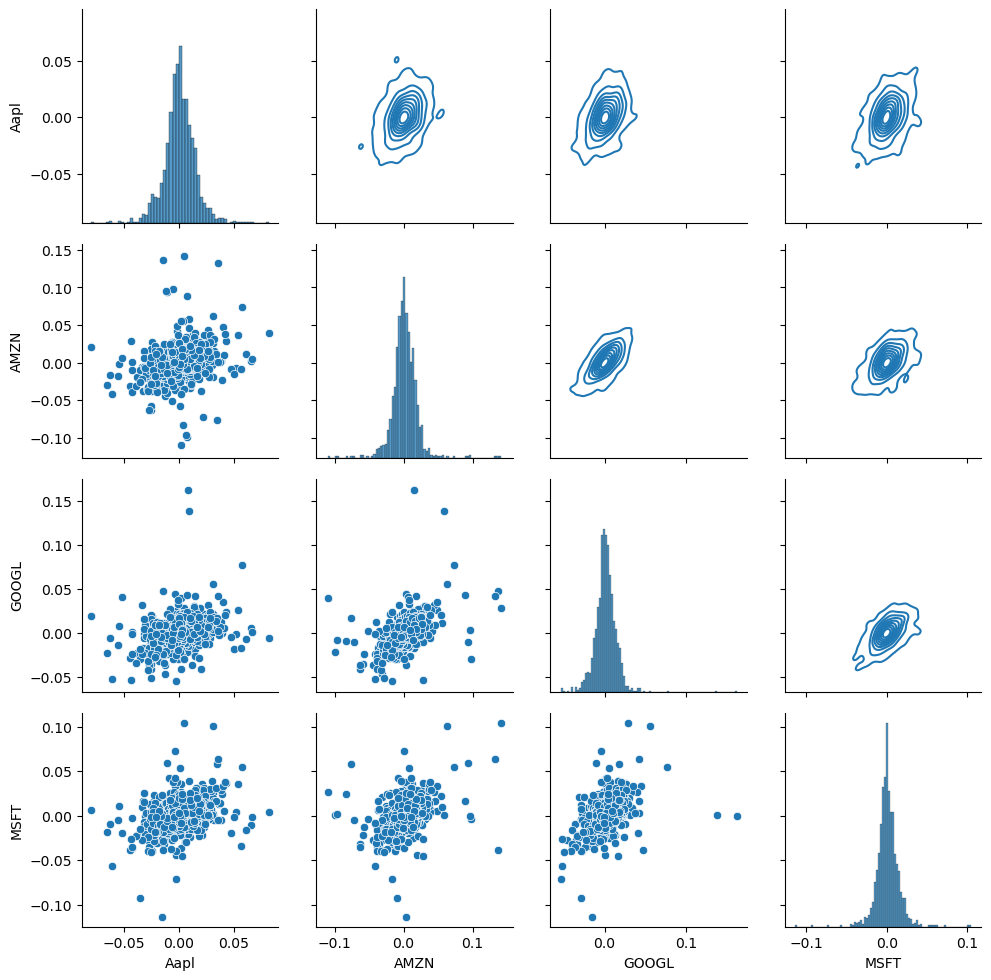

In [249]:
g=sns.PairGrid(data=change_price)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [252]:
(closing_price['aapl']-closing_price['aapl'].shift(1))/closing_price['aapl'] * 100

date
2013-02-08         NaN
2013-02-11    1.031484
2013-02-12   -2.571107
2013-02-13   -0.190660
2013-02-14   -0.090015
                ...   
2018-02-01    0.208607
2018-02-02   -4.535826
2018-02-05   -2.562464
2018-02-06    4.011532
2018-02-07   -2.187539
Name: aapl, Length: 1259, dtype: float64

In [255]:
closing_price_df=pd.DataFrame()
for x in closing_price.columns:
    closing_price_df[x+'_change']=(closing_price[x]-closing_price[x].shift(1))/closing_price[x] * 100

In [256]:
closing_price_df

,aapl_change,AMZN_change,GOOGL_change,MSFT_change
date,,,,
2013-02-08,NaN,NaN,NaN,NaN
2013-02-11,1.031484,-1.842852,-0.377042,1.112706
2013-02-12,-2.571107,0.575957,-0.220325,0.071736
2013-02-13,-0.190660,3.996734,0.275917,0.535141
2013-02-14,-0.090015,-0.085426,0.629591,0.035663
...,...,...,...,...
2018-02-01,0.208607,-4.380576,-0.053318,-0.795672
2018-02-02,-4.535826,2.793804,-5.574518,-2.702114
2018-02-05,-2.562464,-2.874101,-5.347377,-4.295455


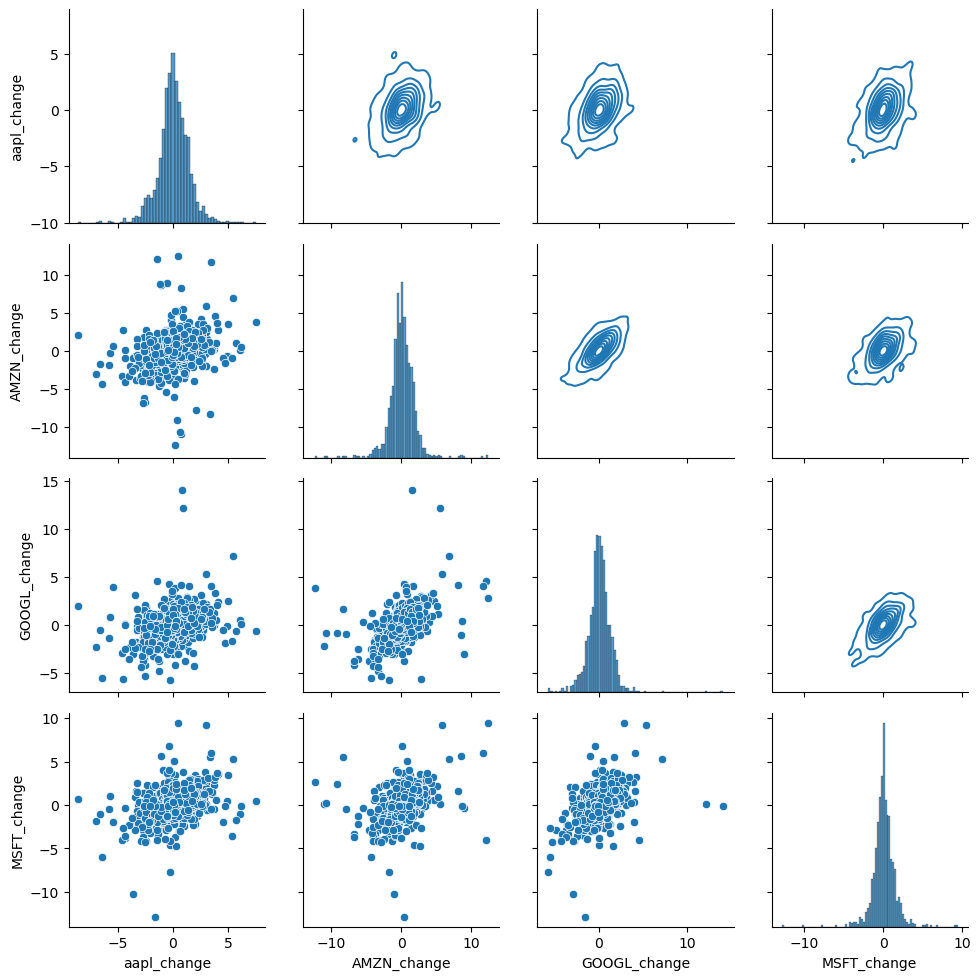

In [257]:
g=sns.PairGrid(data=closing_price_df)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)